# Import Library and import files

Data collection method: web scraping
Data is pre-cleaned

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error


train = pd.read_csv("C:/Users/user/OneDrive/Desktop/condo_train.csv")
test = pd.read_csv("C:/Users/user/OneDrive/Desktop/condo_test.csv")
train

,id,price,room,bath,size,gym,parking,pool,library,club,cbd
0,10001,134272.73,1,1,52.00,1,1,1,0,0,1
1,10002,114297.82,1,1,34.99,1,0,1,0,0,1
2,10003,64316.15,2,2,98.00,1,0,1,0,0,1
3,10004,106245.32,1,1,45.70,1,0,1,0,0,1
4,10005,175187.95,2,2,97.00,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1595,11596,78289.57,0,1,22.00,1,1,1,0,0,0
1596,11597,148638.65,1,2,70.00,1,1,1,0,0,0
1597,11598,175892.86,2,2,80.00,1,1,1,0,0,1
1598,11599,79545.45,1,1,32.00,1,0,1,0,0,0


In [2]:
print(train.isnull().sum())
print("Duplicated: ",train["id"].duplicated().sum())

id         0
price      0
room       0
bath       0
size       0
gym        0
parking    0
pool       0
library    0
club       0
cbd        0
dtype: int64
Duplicated:  0


# EDA

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-p

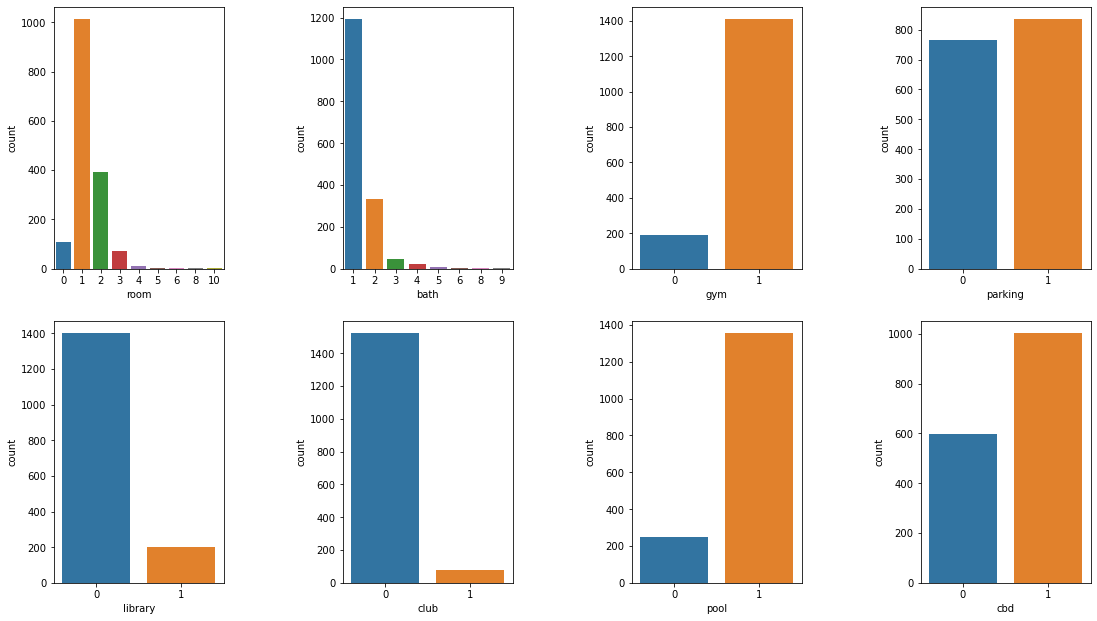

<ipython-input-3-882467057385>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [3]:
room = train['room']
bath = train['bath']
gym = train['gym']
parking = train['parking']
pool = train['pool']
library = train['library']
club = train['club']
cbd = train['cbd']

fig, ax =plt.subplots(2,4, figsize=(18,10))
sns.countplot(room, ax=ax[0,0])
sns.countplot(bath, ax=ax[0,1])
sns.countplot(gym, ax=ax[0,2])
sns.countplot(parking, ax=ax[0,3])
sns.countplot(library, ax=ax[1,0])
sns.countplot(club, ax=ax[1,1])
sns.countplot(pool, ax=ax[1,2])
sns.countplot(cbd, ax=ax[1,3])

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.7,
                    hspace=0.2)
plt.show()

fig.show()

In [4]:
train.drop(train[train["room"] == 0].index, inplace = True)

(array([1.37e+03, 9.50e+01, 1.60e+01, 6.00e+00, 3.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([ 19. , 107.6, 196.2, 284.8, 373.4, 462. , 550.6, 639.2, 727.8,
        816.4, 905. ]),
 <BarContainer object of 10 artists>)

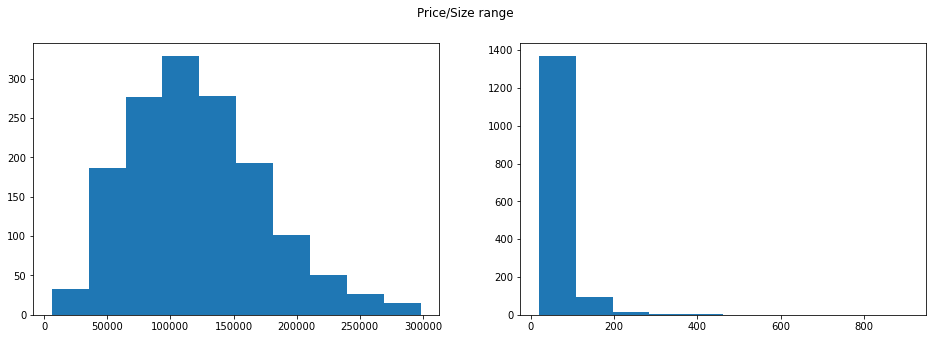

In [5]:
price_range = train["price"]
size_range = train["size"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle('Price/Size range')
ax1.hist(price_range)
ax2.hist(size_range)

In [6]:
print("price_summ")
print(price_range.describe())
print("---------------------------------------------------")
print("size_summ")
print(size_range.describe())

price_summ
count      1492.000000
mean     121733.676468
std       53963.997535
min        5942.470000
25%       82461.270000
50%      116026.130000
75%      154379.430000
max      298215.430000
Name: price, dtype: float64
---------------------------------------------------
size_summ
count    1492.000000
mean       57.588365
std        49.301807
min        19.000000
25%        33.000000
50%        45.000000
75%        63.547500
max       905.000000
Name: size, dtype: float64


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

col_names = ['size']
features = train[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

features

array([[-0.1133881 ],
       [-0.45852157],
       [ 0.81995342],
       ...,
       [ 0.45473282],
       [-0.51918876],
       [-0.45831867]])

In [8]:
train['size_scaled'] = features
train.head()

,id,price,room,bath,size,gym,parking,pool,library,club,cbd,size_scaled
0,10001,134272.73,1,1,52.00,1,1,1,0,0,1,-0.113388
1,10002,114297.82,1,1,34.99,1,0,1,0,0,1,-0.458522
2,10003,64316.15,2,2,98.00,1,0,1,0,0,1,0.819953
3,10004,106245.32,1,1,45.70,1,0,1,0,0,1,-0.241215
4,10005,175187.95,2,2,97.00,1,0,0,0,0,1,0.799663


Text(0.5, 1.0, 'pearson correlation')

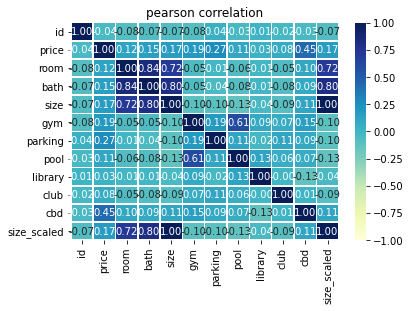

In [9]:
corr_matrix = train.copy()
for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

# Train a model

In [10]:
x = train.drop(["price", "id","size"], axis = 1)
y = train["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=200)

# Evaluate a model

In [11]:
kNR = KNeighborsRegressor()
DTR = DecisionTreeRegressor()
LR = LinearRegression()
LS = Lasso()
EN = ElasticNet()
RFR = RandomForestRegressor()

models = [kNR, DTR, LR, LS, EN, RFR]

In [12]:
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(model)
    print("R2 Score: ", r2_score(y_test,y_pred))
    print("rmse: ", mean_squared_error(y_test,y_pred, squared = False))
    print("---------------------------------------------------------------------------------")

KNeighborsRegressor()
R2 Score:  0.27960042662412254
rmse:  47042.45201435748
---------------------------------------------------------------------------------
DecisionTreeRegressor()
R2 Score:  0.18131650256201726
rmse:  50148.880815167926
---------------------------------------------------------------------------------
LinearRegression()
R2 Score:  0.22193874685821147
rmse:  48888.88373476486
---------------------------------------------------------------------------------
Lasso()
R2 Score:  0.22199165250279207
rmse:  48887.221563652856
---------------------------------------------------------------------------------
ElasticNet()
R2 Score:  0.14496633169634543
rmse:  51250.11392721228
---------------------------------------------------------------------------------
RandomForestRegressor()
R2 Score:  0.29367712800015455
rmse:  46580.57679196835
---------------------------------------------------------------------------------


In [13]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(RFR.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [14]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [15]:
rfr_random = RandomizedSearchCV(estimator = RFR, param_distributions = random_grid, n_iter = 500, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rfr_random.fit(x_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [16]:
rfr_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [17]:
def evaluate(model, x_test, y_test):
    predictions = model.predict(x_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)

best_random = rfr_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 34777.4499 degrees.
Accuracy = 63.03%.
Model Performance
Average Error: 33807.7526 degrees.
Accuracy = 64.34%.
Improvement of 2.07%.


In [18]:
rfr_random.fit(x_train, y_train)
y_pred = rfr_random.predict(x_test)

print("R2 Score: ", r2_score(y_test,y_pred))
print("rmse: ", mean_squared_error(y_test,y_pred, squared = False))

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
R2 Score:  0.3632670341798989
rmse:  44226.4310851772
